## 1번 가상화폐 100종의 가격을 기록한 데이터가 있다고 가정합시다.
그리고 각 가상화폐들의 매 10분마다 가격을 기록한다고 합시다.

단, 가격 변동 과정에서 0원 이하로는 내려가지 않는다고 하겠습니다.
(구체적으로 처음 가격을 어떻게 정할지, 어떻게 변동시킬지는 원하시는대로 설정 해 보세요)

예를 들어 아래와 같은 식으로 csv 파일로 저장하세요.

date,time,stock1,stock2,stock3,....,stock100
2023-01-01,00:00:00,10000,100,200,300,....,1000000
2023-01-01,00:10:00,10010,200,100,700,....,900000

이와 같은 식으로 매일 하나의 파일이 생성된다고 합시다. 이렇게 1년간의 데이터를 수집했다고 합시다.

2023-01-01.csv
2023-01-02.csv
...

In [2]:
#make_date.py
import datetime
date = datetime.datetime(2023, 1, 1, 0, 0, 0)
date_list = [(date + datetime.timedelta(days=i)).strftime("%Y-%m-%d") for i in range(365)] #2023-01-01 ~ 2023-12-31
print(date_list)

['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12', '2023

In [7]:
#make_data4day.py #1일치 모든 데이터 생성
import numpy as np
import random
import datetime
import sys

def make_data4day(seed=0):
    import random
    import numpy as np
    import datetime
    np.set_printoptions(linewidth=np.inf)
    
    time_list = [(date + datetime.timedelta(minutes=i)).strftime("%H:%M:%S") for i in range(0,1440,10)] #0시 00분~ 23시 50분
    random.seed(int(seed)-1)
    date_ = []
    for i in range(144):
        date_.append(date_list[int(seed)-1])

    price_list = np.c_[date_, time_list]
    rd_range = []
    for i in range(100):
        rd_range.append(random.randrange(100000,500000,10))
        name_lst = []
        for j in range(144):
            a = rd_range[i]-i+(-1)**(i)*10*j
            if a >= 0: 
                name_lst.append(a) #i번째 stock의 데이터
                
            else :
                name_lst.append(-a)
        price_list = np.c_[price_list, name_lst] #stock1부터 stock 100까지 값을 열 방향으로 추가
        
    return price_list

price_list = make_data4day(0)
for i in range(144):
    print(*price_list[i])

2023-12-31 00:00:00 188050 473029 141348 267157 177266 424675 394564 409483 348772 237581 161500 419709 118558 355447 383596 498075 101364 391863 274522 249901 487390 166969 308008 120017 114596 116645 454794 106003 349792 241921 376600 118999 445748 245247 386936 424895 462284 252713 326512 251261 243340 401159 289868 114037 372696 464625 165484 221783 294192 179171 317980 428149 376578 432677 224356 298755 286164 485013 427202 431081 357720 485939 122558 414657 259016 364885 371454 213313 340522 459591 345490 156589 387598 433127 170656 207205 441324 357643 342742 420841 119300 407489 128408 302107 488656 478825 357854 211553 210392 429051 248630 107969 230658 453547 459256 252055 364964 436603 325222 478561
2023-12-31 00:10:00 188060 473019 141358 267147 177276 424665 394574 409473 348782 237571 161510 419699 118568 355437 383606 498065 101374 391853 274532 249891 487400 166959 308018 120007 114606 116635 454804 105993 349802 241911 376610 118989 445758 245237 386946 424885 462294 2

In [44]:
#make_data.sh #365일의 날짜 텍스트 파일을 만들고, 각 365일의 데이터를 cvs파일로 저장
#!/bin/bash
mkdir csv_total #csv_total 폴더에 .csv파일들이 저장됨

python3 make_date.py > make_date.txt

for PROC in `seq 1 365`; do
    python3 ./make_data4day.py $PROC > ./csv_total/$PROC.csv
done

## 2. 데이터 읽기

위의 csv파일 전체를 numpy ndarray로 읽어들이는 코드를 작성해 보세요.
코드가 잘 동작하는지를 확인하기 위해 각 가상화폐 종목들 중,
- 1년간 가장 평균값이 높은 종목을 찾고,
- 해당 종목의 1년간 일 평균 가격 추이를 그려보세요 (즉, 가로축이 날짜, 세로축이 일 평균가격인 꺾은선 그래프)

여기에서는 multiprocessing등 없이, 모든 데이터를 한 코드 안에서 전부 읽어서 처리하도록 단순하게 작성해 보세요.



In [8]:
import numpy as np
import time
from tqdm import tqdm
np.set_printoptions(linewidth=np.inf)
data_yr = []
stock_day_avg = []
start = time.time()
for index in tqdm(range(1, 366)):
    #전체 데이터 불러오기
    filename = f"csv_total/{index}.csv"
    data_day = np.loadtxt(filename, dtype="str", delimiter=' ')
    data_yr.append(data_day)
    
    #각 종목에 대한 일평균
    stock_data = np.array(data_day[:,2:], dtype='f') #float32, numpy.ndarray
    stock_avg = stock_data.sum(axis=0) / 144
    stock_day_avg.append(stock_avg)

stock_day_avg = np.array(stock_day_avg)
end = time.time()


100%|██████████| 365/365 [00:06<00:00, 57.01it/s]


최대 연평균값: 314786.53 / 해당 종목 31 번 가상화폐 종목
total time: 6.407131195068359 sec


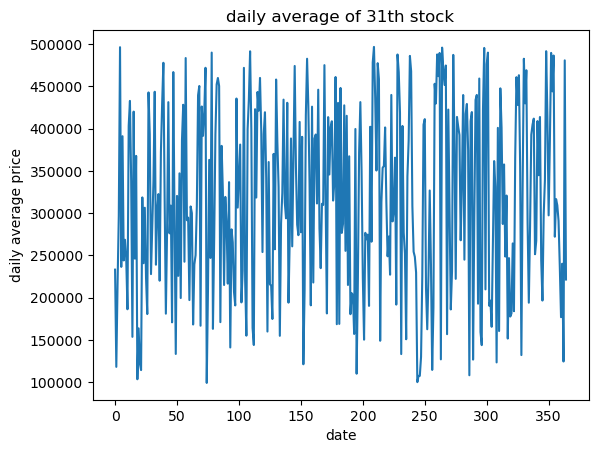

In [9]:
#각 종목에 대한 연평균
for i in range(1,366):
    stock_ann_avg = stock_day_avg.sum(axis=0) / 365
num = stock_ann_avg.argmax()
print("최대 연평균값:", stock_ann_avg[num], "/ 해당 종목", num,"번 가상화폐 종목") #44
print(f'total time: {end-start} sec')
data_yr = np.array(data_yr) #numpy.ndarray

#1년간 일평균 가격 추이
import matplotlib.pyplot as plt
plt.plot(stock_day_avg[:,num])
plt.xlabel('date')
plt.ylabel('daily average price')
plt.title(f'daily average of {num}th stock')
plt.show()

## 3. 외부 스크립트로 병렬화하기

일평균을 계산하는 python 스크립트를 작성하고, 이를 별도의 스크립트에서 구동한 다음 결과를 합치는 방식으로
위의 2번 문제를 해결하도록 해 보세요. 구동 스크립트는 파이썬 (os.system, os.popen, 등 아무 방식이나) 으로 작성하셔도 되고
bash ( for .. `seq`, xargs 등 아무 방식이나) 로 하셔도 괜찮습니다.

In [11]:
#cal_day_avg.py
import numpy as np
import sys

np.set_printoptions(linewidth=np.inf)

#cal_avg.sh에서는 filename에 f'csv_total/{sys.argv[1]}.csv'변경
filename = 'csv_total/1.csv'
data_day = np.loadtxt(filename, dtype="str", delimiter=' ')
stock_data = np.array(data_day[:,2:], dtype='f')
stock_avg = np.array(stock_data.sum(axis=0) / 144)
print(*stock_day_avg)

[353184.7  374904.   127243.   268962.   435770.56 417730.   366078.66 298048.   413046.56 333926.   483024.44 242424.   431452.56 190542.   285400.8  190850.   162839.   263438.   449716.56 493726.   197005.   302514.   165413.   147582.   317080.75 408680.   467558.5  165248.   332546.72 383786.   307904.75 233254.   462782.5  411862.   390800.6  440920.   271388.88 140058.   460266.5  108446.   161795.   360614.   101413.   422712.   318990.72 259080.   313788.78 140508.   225877.   471156.   245954.94 255604.   194043.   455082.   394240.6  159000.   153379.   308978.   433536.53 419876.   172125.   296774.   461922.5  289982.   182441.   457990.   318718.72 453298.   233817.   494516.   459274.5  484314.   289152.8  390832.   160691.   489990.   352878.66 306978.   477886.56 257866.   290904.8  219704.   224743.   221572.   122231.   269630.   412918.56 144468.   159487.   184536.   198625.   124514.   153213.   453472.   357050.66 442970.   281248.88 441148.   254946.94 240216.  

In [ ]:
#cal_avg.sh #각 종목의 일평균 데이터를 csv파일로 저장
#!/bin/bash
touch day_avg.csv
start=$(date +%s)
seq 1 365 | xargs -n 1 -P $1 python3 ./cal_day_avg.py >> ./day_avg.csv
end=$(date +%s)
echo "time: $(($end-$start)) sec"

최대 연평균값: 314786.5207123288 / 해당 종목 31 번 가상화폐 종목


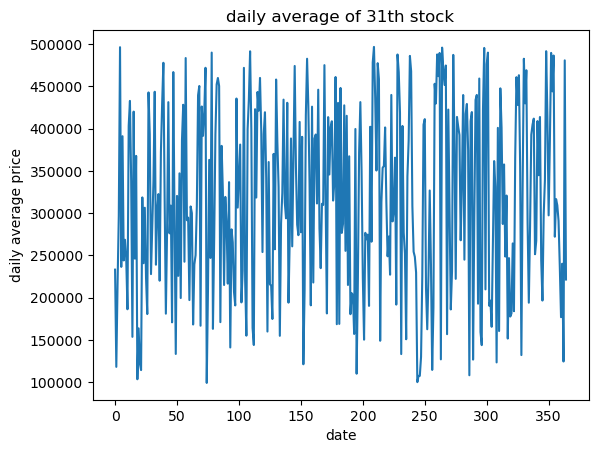

In [12]:
#cal_ann_avg.py
import numpy as np
import matplotlib.pyplot as plt
def cal_ann(filename):
    day_avg = np.loadtxt(f'{filename}', dtype="str", delimiter=' ').astype(float)
    stock_ann_avg = np.array(day_avg.sum(axis=0) / 365)
    num = stock_ann_avg.argmax()
    print("최대 연평균값:", stock_ann_avg[num], "/ 해당 종목", num,"번 가상화폐 종목") #44

    plt.plot(day_avg[:,num])
    plt.xlabel('date')
    plt.ylabel('daily average price')
    plt.title(f'daily average of {num}th stock')
    plt.show()
#그래프를 그릴때는, PROC=1로 지정하고, timecheck.sh에서 cal_avg.sh가 1번만 돌아가게 해야함
#(안그러면 365일에 대한 연산이 6번 반복된 값이 .csv에 저장되기 떄문)
cal_ann('day_avg.csv')

## 4. python Multiprocessing적용하기

multiprocessing 모듈을 이용해 위의 코드를 개선하고, 위의 2번에서 구한 일평균 가격 추이 그래프를 그려보세요.

In [13]:
#cal_day_avg_mp.py #반드시 .py파일로 개별적으로 실행할 것
import numpy as np
import sys
import multiprocessing
def cal_day_avg(i):
    np.set_printoptions(linewidth=np.inf)
    filename = f'csv_total/{i}.csv'
    data_day = np.loadtxt(filename, dtype="str", delimiter=' ')
    stock_data = np.array(data_day[:,2:], dtype='f')
    stock_avg = np.array(stock_data.sum(axis=0) / 144)
    print(*stock_avg)

if __name__ == '__main__':
    procs = []
    #cal_avg.sh에서는 range(1,366) 대신 range(1,int(sys.argv[1])로 받음
    for i in range(1,366):
        p = multiprocessing.Process(target=cal_day_avg, args=(i, ))
        p.start()
        procs.append(p)
    for p in procs:
        p.join()

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/gyuhuikwon/miniconda3/envs/cocker/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gyuhuikwon/miniconda3/envs/cocker/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'cal_day_avg' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/gyuhuikwon/miniconda3/envs/cocker/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gyuhuikwon/miniconda3/envs/cocker/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^

In [ ]:
#cal_avg.sh
#!/bin/bash
touch day_avg_mp.csv
start=$(date +%s)
echo 366 | xargs -n 1 -P $1 python3 ./cal_day_avg_mp.py >> ./day_avg_mp.csv
end=$(date +%s)
echo "time with mp: $(($end-$start)) sec"

최대 연평균값: 314786.5207123288 / 해당 종목 31 번 가상화폐 종목


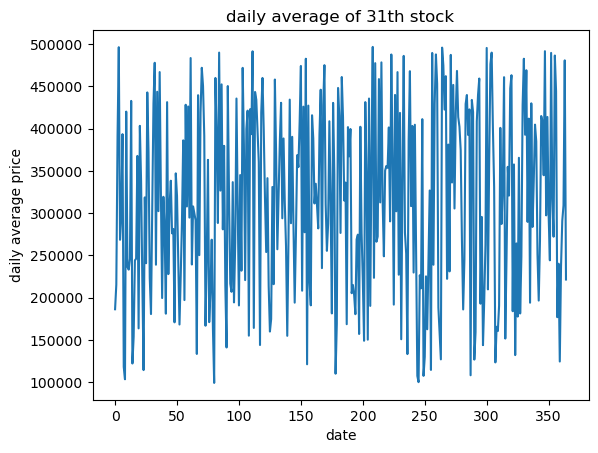

In [14]:
from cal_ann_avg import cal_ann
cal_ann('day_avg_mp.csv')

## 5. python futures.ProcessPoolExecutor 적용하기

futures 모듈을 이용해 같은 코드를 작성하고 2번에서 구한 일평균 가격 추이 그래프를 그려보세요.



In [ ]:
#cal_day_avg_ppe.py #반드시 .py 파일로 개별적으로 실행할 것
import numpy as np
import sys
from concurrent.futures import ProcessPoolExecutor
def cal_day_avg(i):
    np.set_printoptions(linewidth=np.inf)
    filename = f'csv_total/{i}.csv'
    data_day = np.loadtxt(filename, dtype="str", delimiter=' ')
    stock_data = np.array(data_day[:,2:], dtype='f')
    stock_avg = np.array(stock_data.sum(axis=0) / 144)
    print(*stock_avg)

if __name__ == '__main__':
    #cal_avg.sh에서는 range(1,366) 대신 range(1,int(sys.argv[1])로 받음
    num = np.array(range(1,366))
    pool = ProcessPoolExecutor(max_workers=1)
    results = list(pool.map(cal_day_avg, num))

In [ ]:
#cal_avg.sh
#!/bin/bash
touch day_avg_ppe.csv
start=$(date +%s)
echo 366 | xargs -n 1 -P $1 python3 ./cal_day_avg_ppe.py >> ./day_avg_ppe.csv
end=$(date +%s)
echo "time with ppe: $(($end-$start)) sec"

최대 연평균값: 314786.5207123288 / 해당 종목 31 번 가상화폐 종목


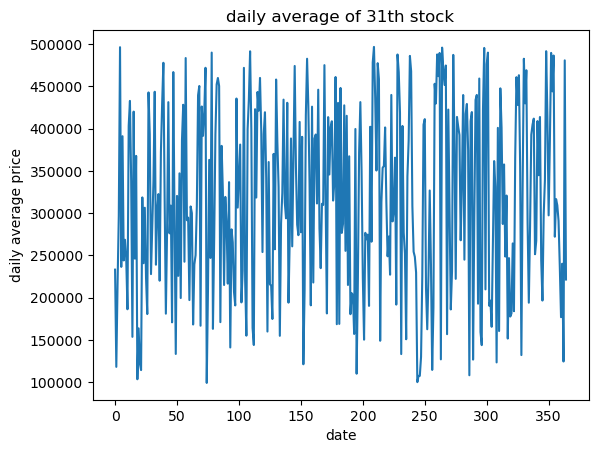

In [16]:
from cal_ann_avg import cal_ann
cal_ann('day_avg_ppe.csv')

## 6. 성능 평가하기

위에서 해 본 각각의 방식들에 대해서 성능 향상이 있는지 확인 해 보세요.

사용하는 CPU갯수에 대해서 계산 속도가 증가하는지, 또는 감소하는지 확인할 수 있도록 그래프를 그려 확인 해 보세요.
(speedup vs number of CPUs)



In [17]:
'''
걸린 시간을 비교하면 다음과 같다.(cal_avg.sh를 실행하여 터미널에서 확인 가능)
time: 61 seconds (3번)
time with mp: 22 seconds (4번)
time with ppe: 4 seconds (5번)
'''

'\n걸린 시간을 비교하면 다음과 같다.(cal_avg.sh를 실행하여 터미널에서 확인 가능)\ntime: 61 seconds (3번)\ntime with mp: 22 seconds (4번)\ntime with ppe: 4 seconds (5번)\n'

In [ ]:
#timecheck.sh
#!/bin/bash
MINPROC=1
MAXPROC=6

touch time_by_process.txt

for PROC in `seq $MINPROC $MAXPROC`; do
  echo number of process: $PROC | tee -a time_by_process.txt
  (./cal_avg.sh $PROC) 2>&1 | tee -a time_by_process.txt
done

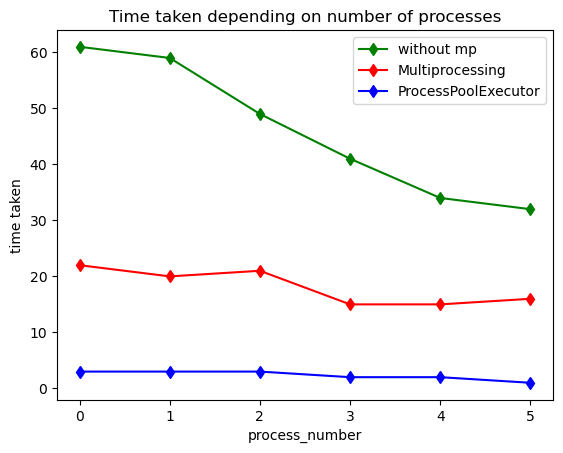

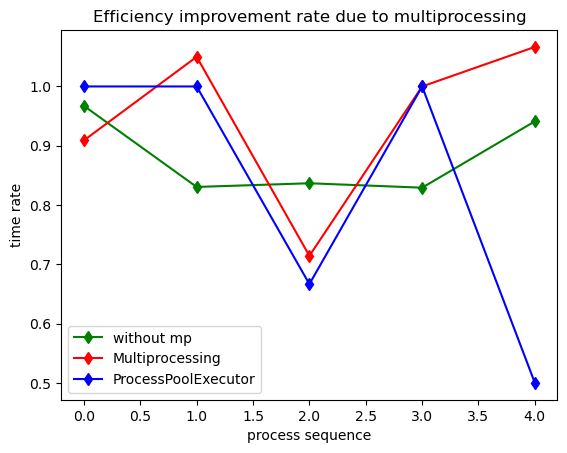

In [22]:
#from time_by_process.txt
time_ = [61, 59, 49, 41, 34, 32]
time_mp = [22, 20, 21, 15, 15, 16]
time_ppe = [3, 3, 3, 2, 2, 1]
time_rate_ = []
time_rate_mp = []
time_rate_ppe = []
for i in range(5):
    rate1 = time_[i+1]/time_[i]
    time_rate_.append(rate1)
    rate2 = time_mp[i+1]/time_mp[i]
    time_rate_mp.append(rate2)
    rate3 = time_ppe[i+1]/time_ppe[i]
    time_rate_ppe.append(rate3)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(time_,'-dg', label='without mp')
plt.plot(time_mp, '-dr', label='Multiprocessing')
plt.plot(time_ppe, '-db', label='ProcessPoolExecutor')
plt.xlabel('process_number')
plt.ylabel('time taken')
plt.title('Time taken depending on number of processes')
plt.legend()
plt.figure()
plt.plot(time_rate_,'-dg', label='without mp')
plt.plot(time_rate_mp, '-dr', label='Multiprocessing')
plt.plot(time_rate_ppe, '-db', label='ProcessPoolExecutor')
plt.xlabel('process sequence')
plt.ylabel('time rate')
plt.title('Efficiency improvement rate due to multiprocessing')
plt.legend()